# Import Data

In [1]:
import pandas as pd

In [2]:

train_dataset = pd.read_csv('train_dataset.csv')

In [3]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56317 entries, 0 to 56316
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   no                             56317 non-null  int64  
 1   APP_date                       56317 non-null  object 
 2   APP_Area                       56317 non-null  object 
 3   APP_Province                   56317 non-null  object 
 4   APP_Shop Name                  56317 non-null  object 
 5   gender                         56317 non-null  object 
 6   date_of_birth_week             56317 non-null  int64  
 7   date_of_birth                  56317 non-null  object 
 8   marital_status                 56317 non-null  int64  
 9   number_of_children             56317 non-null  int64  
 10  postal_code                    56316 non-null  float64
 11  tel_category                   56317 non-null  int64  
 12  number_of_resident             56317 non-null 

In [4]:
train_dataset.nunique()

no                               56317
APP_date                           152
APP_Area                             9
APP_Province                        53
APP_Shop Name                       94
gender                               3
date_of_birth_week                   7
date_of_birth                    12355
marital_status                       5
number_of_children                  10
postal_code                        867
tel_category                         3
number_of_resident                  40
living_period_year                  61
living_period_month                 13
type_of_residence                    7
c_postal_code                      720
c_business_type                     17
c_number_of_employee               667
c_position                           5
c_occupation                         9
c_employment_status                  5
c_monthly_salary                 12253
c_number_of_working_year            42
c_number_of_working_month           13
c_salary_payment_methods 

# Data Preprocessing

In [5]:
train_dataset['APP_date'] = train_dataset['APP_date'].astype('datetime64')
train_dataset['date_of_birth'] = train_dataset['date_of_birth'].astype('datetime64')

train_dataset = train_dataset.drop(['r_generalcode1', 'r_generalcode2'], axis=1)

train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56317 entries, 0 to 56316
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   no                             56317 non-null  int64         
 1   APP_date                       56317 non-null  datetime64[ns]
 2   APP_Area                       56317 non-null  object        
 3   APP_Province                   56317 non-null  object        
 4   APP_Shop Name                  56317 non-null  object        
 5   gender                         56317 non-null  object        
 6   date_of_birth_week             56317 non-null  int64         
 7   date_of_birth                  56317 non-null  datetime64[ns]
 8   marital_status                 56317 non-null  int64         
 9   number_of_children             56317 non-null  int64         
 10  postal_code                    56316 non-null  float64       
 11  tel_category   

## Data Splitting
- Data (sample / full)
    - data : 90%
        - train : 80% /90 = 72 /100
        - test : 20% /90 = 18 /100
    - data_unseen : 10%

In [6]:
dataset = train_dataset
# dataset = train_dataset.sample(5000)

In [7]:
data = dataset.sample(frac=0.9, random_state=123)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (50685, 39)
Unseen Data For Predictions: (5632, 39)


In [8]:
data.columns

Index(['no', 'APP_date', 'APP_Area', 'APP_Province', 'APP_Shop Name', 'gender',
       'date_of_birth_week', 'date_of_birth', 'marital_status',
       'number_of_children', 'postal_code', 'tel_category',
       'number_of_resident', 'living_period_year', 'living_period_month',
       'type_of_residence', 'c_postal_code', 'c_business_type',
       'c_number_of_employee', 'c_position', 'c_occupation',
       'c_employment_status', 'c_monthly_salary', 'c_number_of_working_year',
       'c_number_of_working_month', 'c_salary_payment_methods',
       'c_date_of_salary_payment', 'media', 'place_for_sending_information',
       'r_expected_credit_limit', 'r_propose', 'r_allloan_case',
       'r_allloan_amount', 'r_additional_income', 'r_spouse_income',
       'r_generalcode3', 'apply', 'FICO_Score', 'default_12month'],
      dtype='object')

# PyCaret

## Setup

In [9]:
from pycaret.classification import *

In [31]:
# All features
categoricals = ['APP_Area', 'APP_Province', 'APP_Shop Name', 'gender', 'date_of_birth_week', 'marital_status', 'postal_code', 'tel_category', 'living_period_year', 'living_period_month', 'type_of_residence', 'c_postal_code', 'c_business_type', 'c_position', 'c_occupation', 'c_employment_status', 'c_salary_payment_methods', 'c_date_of_salary_payment', 'media', 'place_for_sending_information', 'r_propose', 'r_generalcode3', 'apply']
numericals = ['c_number_of_employee', 'c_monthly_salary', 'c_number_of_working_year', 'c_number_of_working_month', 'r_expected_credit_limit', 'r_allloan_case', 'r_allloan_amount', 'r_additional_income', 'r_spouse_income', 'FICO_Score', 'number_of_children', 'number_of_resident']
date = ['APP_date', 'date_of_birth']
ordinals = {'c_position':[6,5,4,3,2,1]}

# Top 10 features from catboost
keep = ['FICO_Score',
'postal_code',
'c_postal_code',
'c_number_of_working_year',
'date_of_birth_year',
'r_alloan_amount',
'living_period_year',
'c_monthly_salary',
'APP_Shop Name',
'number_of_children']


In [36]:
exp = ClassificationExperiment()
exp.setup(data,  target= 'default_12month', session_id= 7, train_size= 0.8, 
          preprocess= True, 
          categorical_features= categoricals,
          numeric_features= numericals,
          numeric_imputation= 'median',
          date_features= date,
          ordinal_features= ordinals,
        #   keep_features= keep
          remove_outliers= True,
          normalize= True,
          )

,Description,Value
0,Session id,7
1,Target,default_12month
2,Target type,Binary
3,Original data shape,"(50685, 39)"
4,Transformed data shape,"(48657, 141)"
5,Transformed train set shape,"(38520, 141)"
6,Transformed test set shape,"(10137, 141)"
7,Ordinal features,2
8,Numeric features,12
9,Date features,2


## Model

In [37]:
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [39]:
exp.compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8695,0.6339,0.0109,0.3275,0.0211,0.0128,0.0385,4.7200
gbc,Gradient Boosting Classifier,0.8706,0.6317,0.0055,0.4016,0.0109,0.0073,0.0334,3.5860
lightgbm,Light Gradient Boosting Machine,0.8704,0.6285,0.0090,0.3883,0.0175,0.0119,0.0410,1.8960
ada,Ada Boost Classifier,0.8704,0.6234,0.0054,0.3725,0.0105,0.0065,0.0297,1.6140
xgboost,Extreme Gradient Boosting,0.8648,0.6151,0.0256,0.2519,0.0464,0.0236,0.0426,1.5400
lr,Logistic Regression,0.8701,0.6091,0.0082,0.3540,0.0161,0.0101,0.0363,1.1990
rf,Random Forest Classifier,0.8710,0.6079,0.0006,0.1500,0.0011,0.0007,0.0049,2.0650
lda,Linear Discriminant Analysis,0.8685,0.6035,0.0130,0.2904,0.0249,0.0137,0.0363,1.2980
et,Extra Trees Classifier,0.8709,0.5997,0.0008,0.1500,0.0015,0.0009,0.0058,2.4570
knn,K Neighbors Classifier,0.8574,0.5298,0.0254,0.1627,0.0440,0.0093,0.0143,1.6330


In [40]:
model_list = ['catboost', 'gbc', 'lightgbm', 'ada', 'xgboost']
# model_list = ['catboost']

In [41]:
my_models = exp.compare_models(include=model_list, n_select=5, sort='AUC')
# my_models = exp.compare_models(include=model_list, n_select=1)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:39:36
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8706,0.6317,0.0055,0.4016,0.0109,0.0073,0.0334,3.9820
lightgbm,Light Gradient Boosting Machine,0.8704,0.6285,0.0090,0.3883,0.0175,0.0119,0.0410,1.9010
ada,Ada Boost Classifier,0.8704,0.6234,0.0054,0.3725,0.0105,0.0065,0.0297,1.9230
catboost,CatBoost Classifier,0.8695,0.6339,0.0109,0.3275,0.0211,0.0128,0.0385,3.8500
xgboost,Extreme Gradient Boosting,0.8648,0.6151,0.0256,0.2519,0.0464,0.0236,0.0426,1.5250


## Tune Model

In [42]:
my_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=7, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=7, reg_alpha=0.0, reg_lambda=0

In [44]:
tuned_models = [exp.tune_model(model, optimize='AUC') for model in my_models]
# tuned_models = exp.tune_model(my_models, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.6319,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8710,0.6290,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8710,0.6334,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8710,0.6321,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8710,0.6341,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8710,0.6273,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8710,0.6263,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8710,0.6431,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8712,0.6329,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8703,0.6186,0.0000,0.0000,0.0000,-0.0015,-0.0105
1,0.8703,0.6257,0.0019,0.2000,0.0038,0.0013,0.0074
2,0.8705,0.6271,0.0057,0.3750,0.0113,0.0074,0.0326
3,0.8713,0.6358,0.0096,0.5556,0.0188,0.0145,0.0600
4,0.8708,0.6398,0.0038,0.4000,0.0076,0.0051,0.0284
5,0.8703,0.6229,0.0019,0.2000,0.0038,0.0013,0.0074
6,0.8700,0.6205,0.0019,0.1667,0.0038,0.0009,0.0043
7,0.8705,0.6446,0.0057,0.3750,0.0113,0.0074,0.0326
8,0.8715,0.6298,0.0096,0.5556,0.0188,0.0145,0.0601


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.6116,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8710,0.6176,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8710,0.6123,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8710,0.6215,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8710,0.6137,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8710,0.6082,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8710,0.6022,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8710,0.6262,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8712,0.6203,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.6180,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8710,0.6270,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8713,0.6275,0.0019,1.0000,0.0038,0.0033,0.0408
3,0.8713,0.6326,0.0019,1.0000,0.0038,0.0033,0.0408
4,0.8708,0.6358,0.0000,0.0000,0.0000,-0.0005,-0.0060
5,0.8710,0.6233,0.0019,0.5000,0.0038,0.0028,0.0246
6,0.8710,0.6209,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8713,0.6478,0.0019,1.0000,0.0038,0.0033,0.0408
8,0.8712,0.6282,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6010,0.6233,0.5908,0.1804,0.2764,0.0982,0.1312
1,0.5763,0.6095,0.5488,0.1622,0.2504,0.0641,0.0873
2,0.5889,0.6389,0.6099,0.1790,0.2768,0.0966,0.1322
3,0.5943,0.6256,0.5946,0.1783,0.2744,0.0947,0.1279
4,0.6010,0.6428,0.6080,0.1837,0.2822,0.1048,0.1409
5,0.5928,0.6324,0.5813,0.1751,0.2691,0.0884,0.1191
6,0.5869,0.6028,0.5793,0.1724,0.2657,0.0835,0.1132
7,0.5961,0.6475,0.6233,0.1845,0.2847,0.1070,0.1456
8,0.6043,0.6275,0.5632,0.1760,0.2682,0.0896,0.1182


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [45]:
tuned_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=7, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(bagging_fraction=0.4, bagging_freq=7, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
                importance_type='split', learning_rate=0.05, max_depth=-1,
                min_child_samples=36, min_child_weight=0.001, min_split_gain=0.7,
                n_estimators=170, n_jobs=-1, num_leaves=10

## Create Models

In [46]:
catboost = exp.create_model('catboost')
catboost_tuned = exp.tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8703,0.6233,0.0096,0.3846,0.0187,0.0125,0.0433
1,0.8691,0.6267,0.0191,0.3571,0.0363,0.0235,0.0568
2,0.8695,0.6461,0.0115,0.3333,0.0222,0.0137,0.0407
3,0.8698,0.6322,0.0153,0.3810,0.0294,0.0196,0.0542
4,0.8678,0.6463,0.0038,0.1176,0.0074,-0.0007,-0.0022
5,0.8686,0.6267,0.0076,0.2222,0.0148,0.0063,0.0186
6,0.8686,0.6177,0.0076,0.2222,0.0148,0.0063,0.0186
7,0.8700,0.6515,0.0096,0.3571,0.0186,0.0120,0.0401
8,0.8712,0.6288,0.0134,0.5000,0.0261,0.0195,0.0652


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.6180,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8710,0.6270,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8713,0.6275,0.0019,1.0000,0.0038,0.0033,0.0408
3,0.8713,0.6326,0.0019,1.0000,0.0038,0.0033,0.0408
4,0.8708,0.6358,0.0000,0.0000,0.0000,-0.0005,-0.0060
5,0.8710,0.6233,0.0019,0.5000,0.0038,0.0028,0.0246
6,0.8710,0.6209,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8713,0.6478,0.0019,1.0000,0.0038,0.0033,0.0408
8,0.8712,0.6282,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
lightgbm = exp.create_model('lightgbm')
lightgbm_tuned = exp.tune_model(lightgbm)

In [ ]:
xgboost = exp.create_model('xgboost')
xgboost_tuned = exp.tune_model(xgboost)

### Logistic Regression

In [ ]:
lr = exp.create_model('lr')
lr_tuned = exp.tune_model(lr)

### Naive Bayes

In [ ]:
nb = exp.create_model('nb')
nb_tuned = exp.tune_model(nb)

# Plot Winning Model

In [47]:
exp.plot_model(catboost_tuned, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,120
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


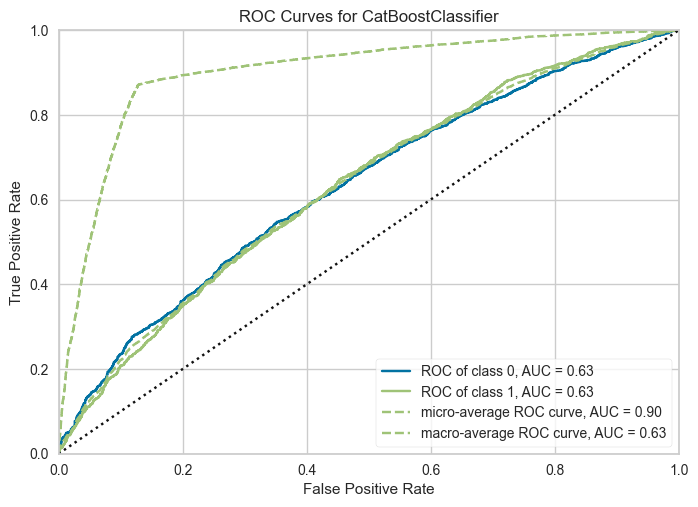

In [48]:
exp.plot_model(catboost_tuned, plot = 'auc')

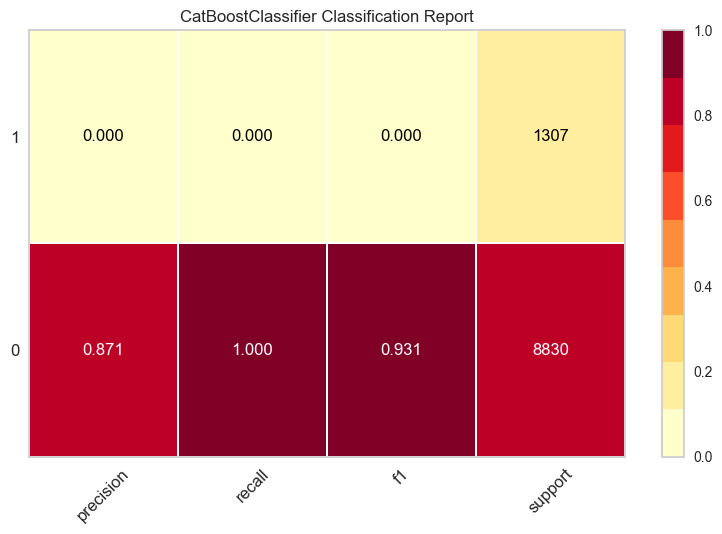

In [49]:
exp.plot_model(catboost_tuned, plot = 'class_report')

In [ ]:
exp.plot_model(catboost_tuned, plot = 'boundary')

In [ ]:
exp.plot_model(catboost_tuned, plot = 'learning')

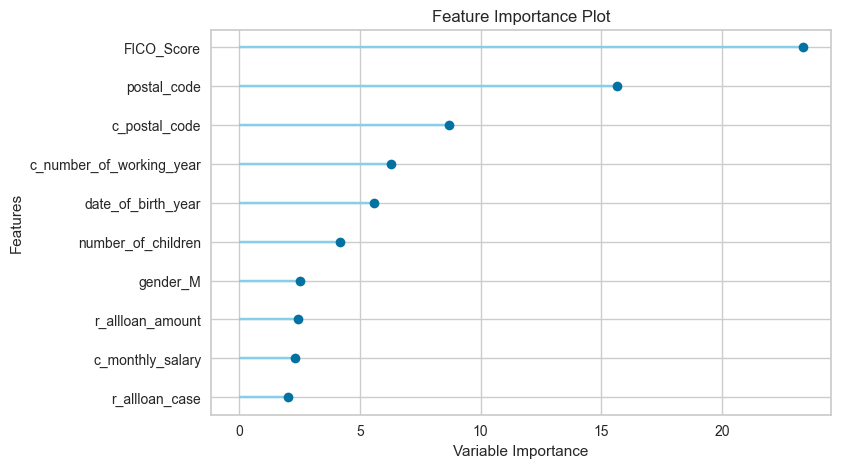

In [50]:
exp.plot_model(catboost_tuned, plot = 'feature')

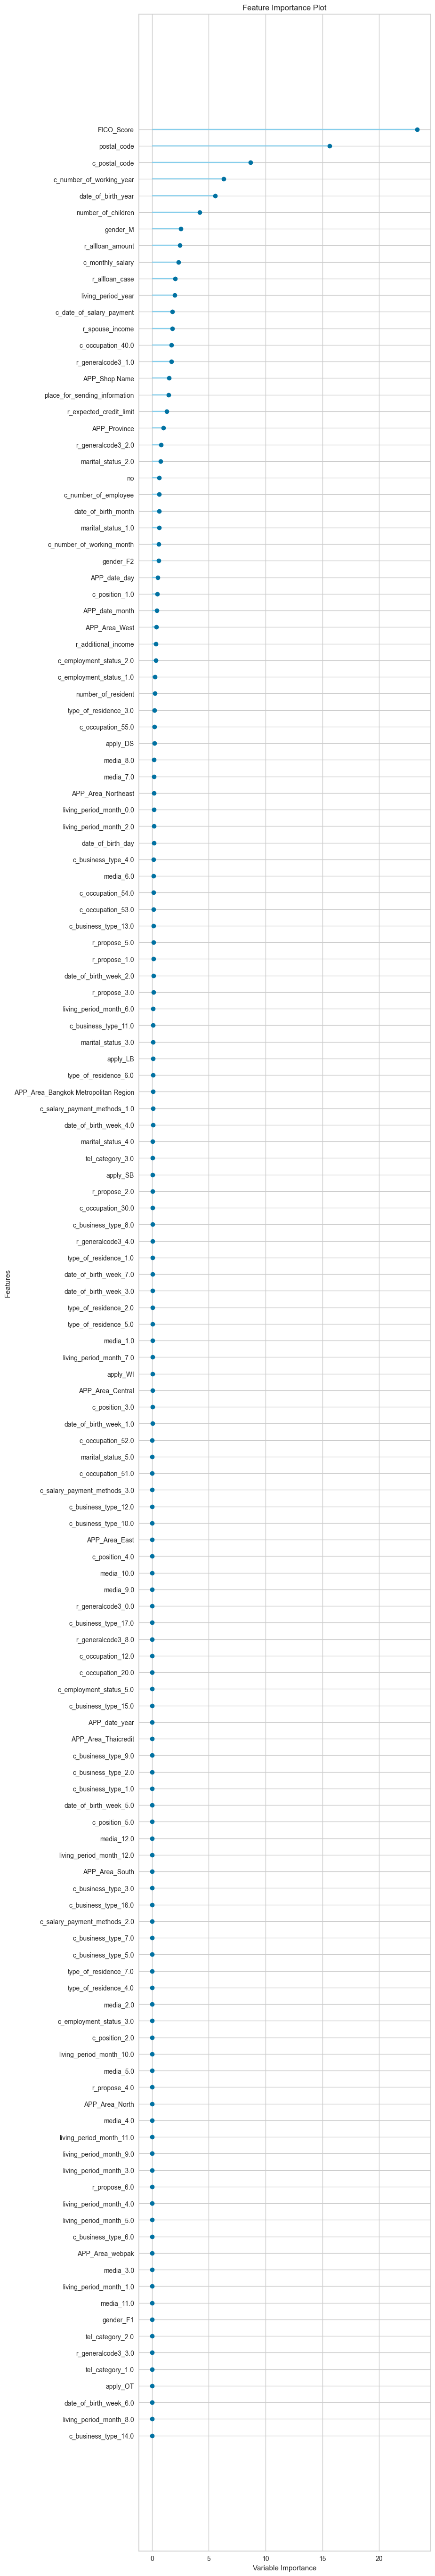

In [59]:
exp.plot_model(catboost_tuned, plot = 'feature_all')

# Predict Test Model

In [51]:
holdout_pred = exp.predict_model(catboost_tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8711,0.6316,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
holdout_pred

# Finalize Model

In [62]:
# final_model = exp.finalize_model(catboost_tuned)
final_model = catboost_tuned
final_model

## Predict Unseen Data

In [ ]:
unseen_predictions = exp.predict_model(final_model, data=data_unseen)
unseen_predictions

# Predict Output

In [65]:
public_dataset = pd.read_csv('public_dataset_without_gt.csv')

In [66]:
public_dataset['APP_date'] = public_dataset['APP_date'].astype('datetime64')
public_dataset['date_of_birth'] = public_dataset['date_of_birth'].astype('datetime64')

public_dataset = public_dataset.drop(['r_generalcode1', 'r_generalcode2'], axis=1)

public_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   no                             11537 non-null  int64         
 1   APP_date                       11537 non-null  datetime64[ns]
 2   APP_Area                       11537 non-null  object        
 3   APP_Province                   11537 non-null  object        
 4   APP_Shop Name                  11537 non-null  object        
 5   gender                         11537 non-null  object        
 6   date_of_birth_week             11537 non-null  int64         
 7   date_of_birth                  11537 non-null  datetime64[ns]
 8   marital_status                 11537 non-null  int64         
 9   number_of_children             11537 non-null  int64         
 10  postal_code                    11537 non-null  float64       
 11  tel_category   

In [ ]:
pred = exp.predict_model(final_model, data = public_dataset, raw_score = True)
pred

In [ ]:
pred['prediction_score_1']

## Export to CSV

In [68]:
result_df = pd.DataFrame({'no': public_dataset['no'], 'default_12month': pred['prediction_score_1']})

result_df = result_df.sort_values(by='no', ascending=True)

result_df.to_csv('output_pyc.csv', index=False, header=['no', 'default_12month'])